### Map visualization

In [13]:
import pandas as pd
criminal = pd.read_csv("criminal.csv")
criminal.head()

,Будинок,Вулиця,Дата/час,Орган,Тип,Час,Latitude,Longtitude,"Час, секунди"
0,11А,22 січня (Рудно),13.09.2015 17:05,ЗАЛІЗНИЧНИЙ ВІДДІЛ ПОЛІЦІЇ ГУНП У ЛЬВІВСЬКІЙ О...,Крадіжка,17:05:00,49.834102,23.887087,61500.0
1,7,Авіаційна,23.12.2015 10:02,ЗАЛІЗНИЧНИЙ ВІДДІЛ ПОЛІЦІЇ ГУНП У ЛЬВІВСЬКІЙ О...,Крадіжка,10:02:00,49.810928,23.931798,36120.0
2,NaN,Авіаційна,05.12.2015 13:20,ЗАЛІЗНИЧНИЙ ВІДДІЛ ПОЛІЦІЇ ГУНП У ЛЬВІВСЬКІЙ О...,Крадіжка,13:20:00,49.812523,23.929722,48000.0
3,1,Авіаційна,30.11.2015 19:30,ЗАЛІЗНИЧНИЙ ВІДДІЛ ПОЛІЦІЇ ГУНП У ЛЬВІВСЬКІЙ О...,Крадіжка,19:30:00,49.816836,23.926929,70200.0
4,NaN,Авіаційна,27.11.2015 11:00,ЗАЛІЗНИЧНИЙ ВІДДІЛ ПОЛІЦІЇ ГУНП У ЛЬВІВСЬКІЙ О...,Крадіжка,11:00:00,49.812523,23.929722,39600.0


In [14]:
minLattitude = min(criminal["Latitude"])
maxLattitude = max(criminal["Latitude"])
minLongtitude = min(criminal["Longtitude"])
maxLongtitude = max(criminal["Longtitude"])
offsetLattitude = (maxLattitude-minLattitude)/20
offsetLongtitude = (maxLongtitude-minLongtitude)/20
minLattitude -= offsetLattitude
maxLattitude += offsetLattitude
minLongtitude -= offsetLongtitude
maxLongtitude += offsetLongtitude

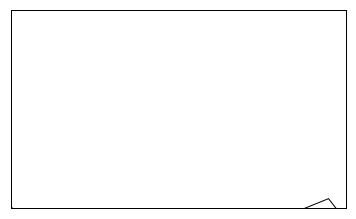

In [16]:
# Import the basemap package
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
%matplotlib inline

# Create a map on which to draw.  We're using a mercator projection, and showing the whole world.
m = Basemap(projection='merc',llcrnrlat=minLattitude,urcrnrlat=maxLattitude,llcrnrlon=minLongtitude,urcrnrlon=maxLongtitude,lat_ts=20,resolution='c')
# Draw coastlines, and the edges of the map.
m.drawcoastlines()
m.drawmapboundary()
# Convert latitude and longitude to x and y coordinates
thefts = criminal[criminal["Тип"] == "Крадіжка"]
frauds = criminal[criminal["Тип"] == "Шахрайство"]
robberies = criminal[criminal["Тип"] == "Пограбування"]
# Use matplotlib to draw the points onto the map.
m.scatter(thefts["Longtitude"],thefts["Latitude"], 1, marker='o',color='#1b9e77')
m.scatter(frauds["Longtitude"],frauds["Latitude"], 1, marker='o',color='#d95f02')
m.scatter(robberies["Longtitude"],robberies["Latitude"], 1, marker='o',color='#7570b3')
# Show the plot.
plt.show()